In [16]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.logging.set_verbosity(tf.logging.ERROR)

In [18]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 11s 0us/step


In [19]:
zip_dir_base = os.path.dirname(zip_dir)

In [20]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [21]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [22]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print('--')
print('total training images:', total_train)
print('total validation images:', total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
total training images: 2000
total validation images: 1000


In [23]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [54]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, axes in zip(images_arr, axes):
        axes.imshow(img)
    plt.tight_layout()
    plt.show()

In [55]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          )

Found 2000 images belonging to 2 classes.


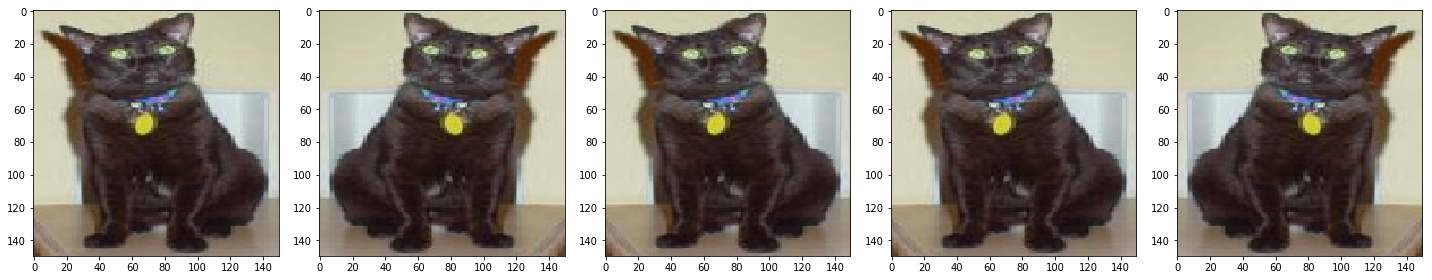

In [56]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [57]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          )

Found 2000 images belonging to 2 classes.


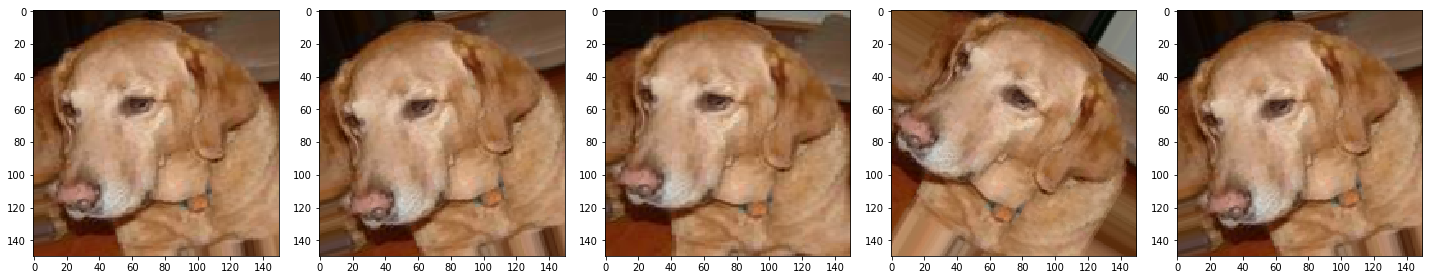

In [58]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [59]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          )

Found 2000 images belonging to 2 classes.


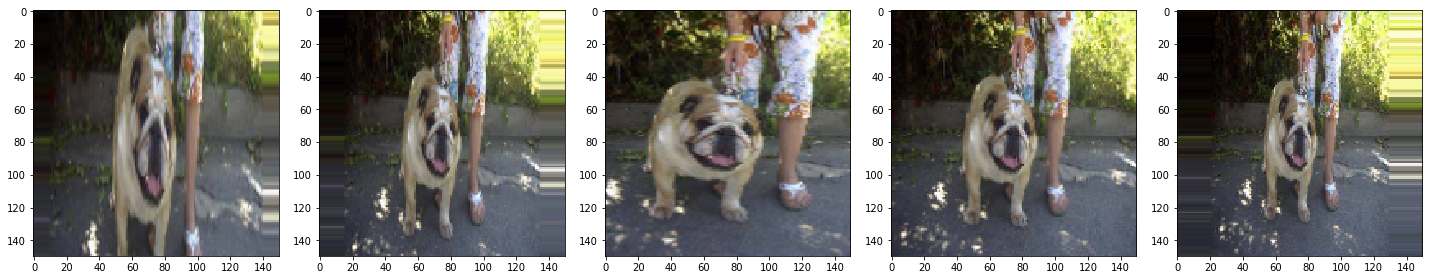

In [60]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [61]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


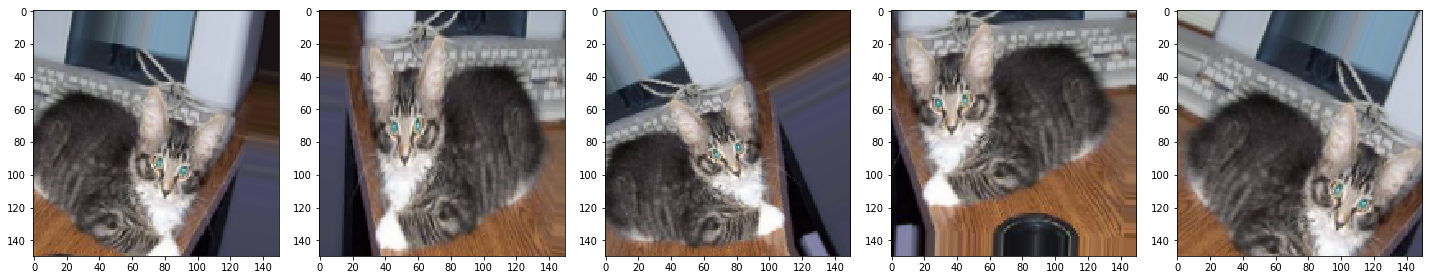

In [62]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [63]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory = validation_dir,
                                                target_size = (IMG_SHAPE, IMG_SHAPE),
                                                class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [65]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [67]:
epochs = 10
history = model.fit_generator(train_data_gen,
                             steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                             epochs=epochs,
                             validation_data = val_data_gen,
                             validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))))

Epoch 1/10
20/20 [==============================] - 94s 5s/step - loss: 0.7746 - acc: 0.5095 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 2/10
20/20 [==============================] - 83s 4s/step - loss: 0.6854 - acc: 0.5385 - val_loss: 0.6609 - val_acc: 0.5900
Epoch 3/10
20/20 [==============================] - 81s 4s/step - loss: 0.6743 - acc: 0.5645 - val_loss: 0.6516 - val_acc: 0.6130
Epoch 4/10
20/20 [==============================] - 82s 4s/step - loss: 0.6703 - acc: 0.5640 - val_loss: 0.6812 - val_acc: 0.5300
Epoch 5/10
20/20 [==============================] - 80s 4s/step - loss: 0.6774 - acc: 0.5455 - val_loss: 0.6395 - val_acc: 0.6460
Epoch 6/10
20/20 [==============================] - 81s 4s/step - loss: 0.6623 - acc: 0.6015 - val_loss: 0.6415 - val_acc: 0.5840
Epoch 7/10
20/20 [==============================] - 80s 4s/step - loss: 0.6322 - acc: 0.6430 - val_loss: 0.6182 - val_acc: 0.6300
Epoch 8/10
20/20 [==============================] - 81s 4s/step - loss: 0.6193 - acc: 0.64

In [76]:
predictions = model.predict(val_data_gen)

In [107]:
print(predictions[0])

[0.5186722  0.48132774]


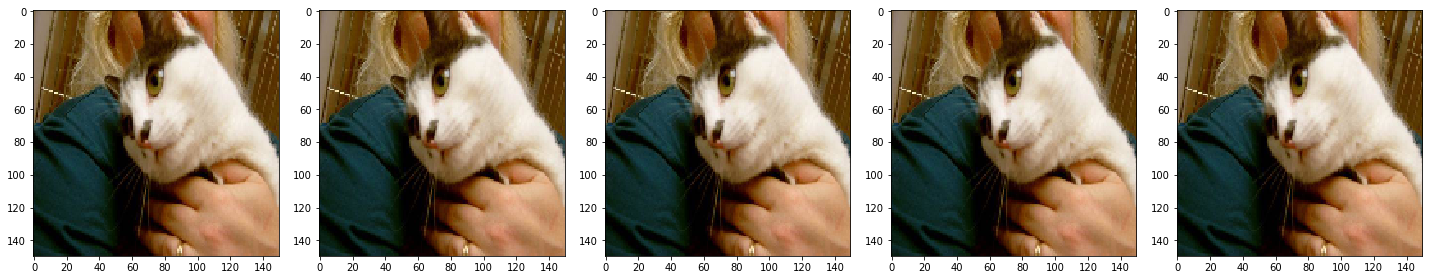

In [111]:
x_images = [val_data_gen[0][0][0] for i in range(5)]
plotImages(x_images)